In [16]:
import lnetatmo as nt
from configparser import ConfigParser

parser = ConfigParser()
parser.read('.env')
config = parser['NETATMO']

client_id     = config['client_id']
client_secret = config['client_secret']
username      = config['username']
password      = config['password']

authorization = nt.ClientAuth(client_id, client_secret, username, password)
weatherData   = nt.WeatherStationData(authorization)
 
def getNetatmoData():
    return weatherData.lastData()

In [19]:
theData = weatherData.lastData()
theData

{'G3 Indoor': {'Temperature': 22.3,
  'CO2': 536,
  'Humidity': 28,
  'Noise': 42,
  'Pressure': 994.2,
  'AbsolutePressure': 969.6,
  'min_temp': 22.3,
  'max_temp': 22.3,
  'date_max_temp': 1676847768,
  'date_min_temp': 1676847768,
  'temp_trend': 'stable',
  'pressure_trend': 'down',
  'When': 1676847768,
  'wifi_status': 63},
 'G3 Outdoor': {'Temperature': -2.5,
  'Humidity': 79,
  'min_temp': -2.5,
  'max_temp': -2.5,
  'date_max_temp': 1676847728,
  'date_min_temp': 1676847728,
  'temp_trend': 'stable',
  'When': 1676847728,
  'battery_vp': 4936,
  'battery_percent': 41,
  'rf_status': 74}}

In [12]:
print('Available modules : ', theData.keys() )

Available modules :  dict_keys(['G3 Indoor', 'G3 Outdoor'])


In [13]:
print('In-house CO2 level : ', theData['G3 Indoor'])

In-house CO2 level :  {'Temperature': 23.2, 'CO2': 493, 'Humidity': 31, 'Noise': 41, 'Pressure': 993.8, 'AbsolutePressure': 969.2, 'min_temp': 22.9, 'max_temp': 23.8, 'date_max_temp': 1675897416, 'date_min_temp': 1675931051, 'temp_trend': 'stable', 'pressure_trend': 'down', 'When': 1675945883, 'wifi_status': 63}


In [14]:
import lnetatmo
devList = lnetatmo.WeatherStationData(authorization)
devList.stationByName()

{'_id': '70:ee:50:65:36:ae',
 'date_setup': 1605480541,
 'last_setup': 1605480541,
 'type': 'NAMain',
 'last_status_store': 1675945885,
 'module_name': 'G3 Indoor',
 'firmware': 181,
 'wifi_status': 63,
 'reachable': True,
 'co2_calibrating': False,
 'data_type': ['Temperature', 'CO2', 'Humidity', 'Noise', 'Pressure'],
 'place': {'altitude': 211,
  'city': 'Trondheim',
  'country': 'NO',
  'timezone': 'Europe/Oslo',
  'location': [10.503161, 63.402379]},
 'station_name': 'Sæterbakken (G3 Indoor)',
 'home_id': '5fb1b05dd8c2486836481168',
 'home_name': 'Sæterbakken',
 'read_only': True,
 'dashboard_data': {'time_utc': 1675945883,
  'Temperature': 23.2,
  'CO2': 493,
  'Humidity': 31,
  'Noise': 41,
  'Pressure': 993.8,
  'AbsolutePressure': 969.2,
  'min_temp': 22.9,
  'max_temp': 23.8,
  'date_max_temp': 1675897416,
  'date_min_temp': 1675931051,
  'temp_trend': 'stable',
  'pressure_trend': 'down'},
 'modules': [{'_id': '02:00:00:64:49:f6',
   'type': 'NAModule1',
   'module_name': 'G3

In [15]:
print ("Current temperature (inside/outside): %s / %s °C" %
        ( devList.lastData()['G3 Indoor']['Temperature'],
          devList.lastData()['G3 Outdoor']['Temperature'])
      )

Current temperature (inside/outside): 23.2 / 2.2 °C


In [17]:
import time
import lnetatmo


weather = nt.WeatherStationData(authorization)

user = weather.user

print("Station owner : ", user.mail)
print("Data units    : ", user.unit)

Station owner :  digitaltwinsmarthouse@gmail.com
Data units    :  metric


In [18]:
# For each station in the account
for station in weather.stations:
    print("\nSTATION : %s\n" % weather.stations[station]["station_name"])

    # For each available module in the returned data of the specified station
    # that should not be older than one hour (3600 s) from now
    for module, moduleData in weather.lastData(exclude=3600).items() :

        # Name of the module (or station embedded module)
        # You setup this name in the web netatmo account station management
        print(module)

        # List key/values pair of sensor information (eg Humidity, Temperature, etc...)
        for sensor, value in moduleData.items() :
            # To ease reading, print measurement event in readable text (hh:mm:ss)
            if sensor == "When" : value = time.strftime("%H:%M:%S",time.localtime(value))
            print("%30s : %s" % (sensor, value))


STATION : Sæterbakken (G3 Indoor)

G3 Indoor
                   Temperature : 23.2
                           CO2 : 493
                      Humidity : 31
                         Noise : 41
                      Pressure : 993.8
              AbsolutePressure : 969.2
                      min_temp : 22.9
                      max_temp : 23.8
                 date_max_temp : 1675897416
                 date_min_temp : 1675931051
                    temp_trend : stable
                pressure_trend : down
                          When : 13:31:23
                   wifi_status : 63
G3 Outdoor
                   Temperature : 2.2
                      Humidity : 80
                      min_temp : 0.8
                      max_temp : 5.5
                 date_max_temp : 1675897409
                 date_min_temp : 1675926786
                    temp_trend : down
                          When : 13:30:59
                    battery_vp : 4948
               battery_percent : 42
         

In [19]:
import datetime, time

import lnetatmo

from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib.ticker import FormatStrFormatter

# Access to the sensors
dev  = nt.DeviceList(authorization)

# Time of information collection : 3*24hours windows to now
now = time.time()
start = now - 3 * 24 * 3600

In [20]:
# Get Temperature and Humidity with GETMEASURE web service (1 sample every 30min)
resp = dev.getMeasure( device_id='70:ee:50:65:36:ae',                             # Replace with your values
                       module_id='70:ee:50:65:36:ae',                             #    "      "    "    "
                       scale="30min",
                       mtype="Temperature,Humidity",
                       date_begin=start,
                       date_end=now)

In [21]:
# Extract the timestamp, temperature and humidity from the more complex response structure
result = [(int(k),v[0],v[1]) for k,v in resp['body'].items()]
# Sort samples by timestamps (Warning, they are NOT sorted by default)
result.sort()
# Split in 3 lists for use with Matplotlib (timestamp on x, temperature and humidity on two y axis)
xval, ytemp, yhum = zip(*result)

# Convert the x axis values from Netatmo timestamp to matplotlib timestamp...
xval = [dates.date2num(datetime.datetime.fromtimestamp(x)) for x in xval]

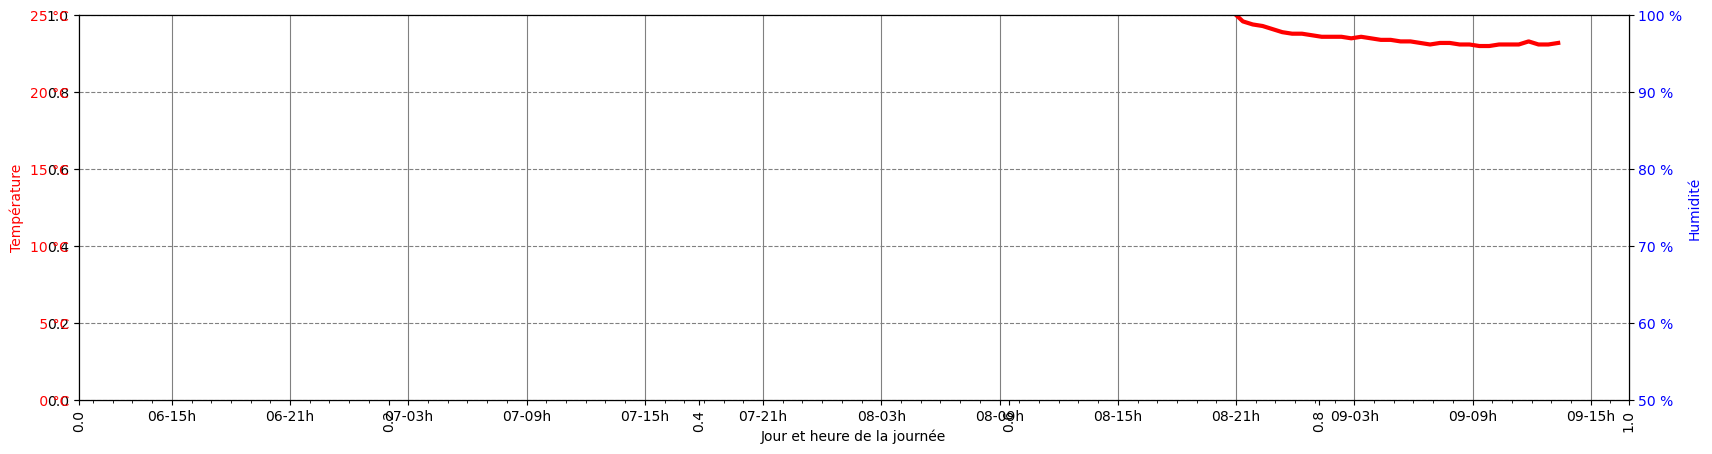

In [23]:
# Build the two curves graph (check Matplotlib documentation for details)
fig = plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')

graph1 = fig.add_subplot(111)

graph1.plot(xval, ytemp, color='r', linewidth=3)
graph1.set_ylabel(u'Température', color='r')
graph1.set_ylim(0, 25)
graph1.yaxis.grid(color='gray', linestyle='dashed')
for t in graph1.get_yticklabels() : t.set_color('r')
graph1.yaxis.set_major_formatter(FormatStrFormatter(u'%2.0f °C'))

graph2 = graph1.twinx()

graph2.plot(xval, yhum, color='b', linewidth=3)
graph2.set_ylabel(u'Humidité',color='b')
graph2.set_ylim(50,100)
for t in graph2.get_yticklabels(): t.set_color('b')
graph2.yaxis.set_major_formatter(FormatStrFormatter(u'%2i %%'))

graph1.xaxis.set_major_locator(dates.HourLocator(interval=6))
graph1.xaxis.set_minor_locator(dates.HourLocator())
graph1.xaxis.set_major_formatter(dates.DateFormatter("%d-%Hh"))
graph1.xaxis.grid(color='gray')
graph1.set_xlabel(u'Jour et heure de la journée')

# X display the resulting graph (you could generate a PDF/PNG/... in place of display).
# The display provides a minimal interface that notably allows you to save your graph
plt.show()